## Import libraries

In [1]:
import os
import pyxdf # xdf file importation
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from my_functions import *
# library for creating filters
from scipy.signal import butter, iirnotch, filtfilt, welch, periodogram
%matplotlib widget


In [2]:
plt.close("all")  # close all figure windows

## Initialization

 ### File selection and loading (Ramdani data)

In [3]:
# Define the xdf file path
FILENAME = "EEG_1channel_1000Hz.txt"
# FILENAME="020_DesMar_20211129_1_c.xdf"
# path=os.path.normpath("../DAT/Input/001_MolLud_20201112_1_c.xdf")
path = os.path.normpath("DAT/INPUT/"+FILENAME)

In [4]:
EEG_amplitudes= np.loadtxt(path,dtype=float,delimiter=",")
Srate=1000
N=len(EEG_amplitudes)

In [5]:
EEG_amplitudes_centered=EEG_amplitudes-np.mean(EEG_amplitudes)

## Plots

(10201,)
N:  10201
duration:  10.201
time_vector shape:  (10201,)


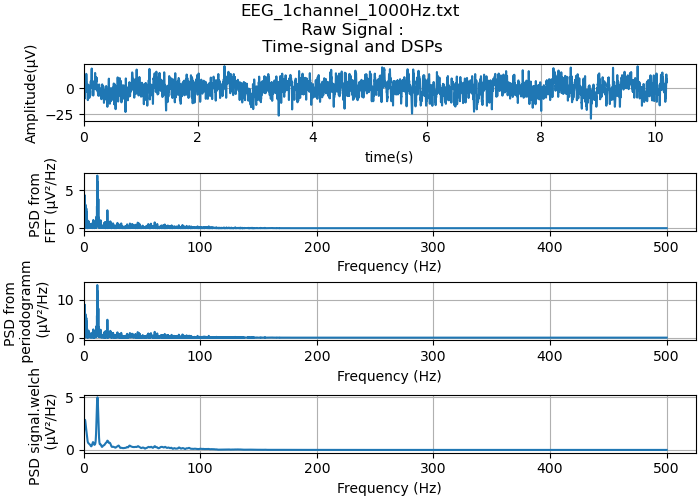

In [6]:
print(EEG_amplitudes.shape)
_,_,_=plot_signal_time_dsps(fig_number=1,signal=EEG_amplitudes,sample_rate=Srate,signal_name=FILENAME + "\n Raw Signal")

N:  10201
duration:  10.201
time_vector shape:  (10201,)


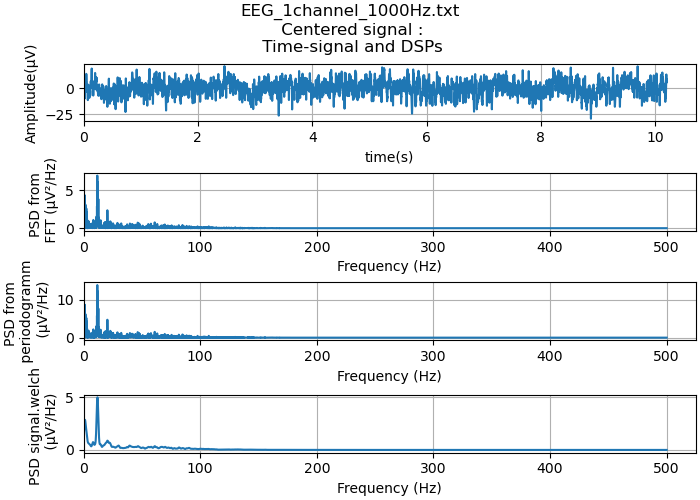

In [7]:
PSD_fft_python,PSD_p_python,PSD_w_python=plot_signal_time_dsps(fig_number=2,signal=EEG_amplitudes_centered,sample_rate=Srate,signal_name=FILENAME+"\n Centered signal")

## Import des resultats matlab

In [8]:
FILENAME2="MATLAB_EEG_PSDs_data_1000Hz"
my_data = np.genfromtxt("./DAT/OUTPUT/"+FILENAME2+'.csv', delimiter=';',skip_header=1)
PSD_fft_matlab=my_data[:,0:2] #1ere colonne frequences, 2e resultats PSD
PSD_p_matlab=my_data[:,2:4]#1ere colonne frequences, 2e resultats PSD
PSD_w_matlab=my_data[:,4:6]#1ere colonne frequences, 2e resultats PSD

## Comparaison resultats matlab

In [9]:
print(np.unique(PSD_fft_python==PSD_fft_matlab))
print(np.unique(PSD_p_python==PSD_p_matlab))
print(np.unique(PSD_w_python==PSD_w_matlab))

[False  True]
[False  True]
[False  True]


CCL: les données semblent etre similaires, mais dans quelle mesure?

#### Moyenne quadratique (RMS) de la difference entre la distribution python et matlab pour chaque methode d'estimation de la PSD

In [10]:
#Difference between python PSD results and matlab
PSD_diff_fft=PSD_fft_python[:,1]-PSD_fft_matlab[:,1] # Difference for PSD from FFT
PSD_diff_p=PSD_p_python[:,1]-PSD_p_matlab[:,1] # Difference for PSD from periodogram()
PSD_diff_w=PSD_w_python[:,1]-PSD_w_matlab[:,1] # Difference for PSD from welch()

#Square the difference
squared_PSD_diff_fft=(PSD_diff_fft)**2 # Difference for PSD from FFT
squared_PSD_diff_p=(PSD_diff_p)**2     # Difference for PSD from periodogram()
squared_PSD_diff_w=(PSD_diff_w)**2     # Difference for PSD from welch()

print(PSD_diff_w.shape[0])
print(len(PSD_diff_w))

RMS_PSD_FFT=np.sqrt(squared_PSD_diff_fft/PSD_diff_fft.shape[0])
RMS_PSD_p=np.sqrt(squared_PSD_diff_p/PSD_diff_p.shape[0])
RMS_PSD_w=np.sqrt(squared_PSD_diff_w/PSD_diff_w.shape[0])


5101
5101


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


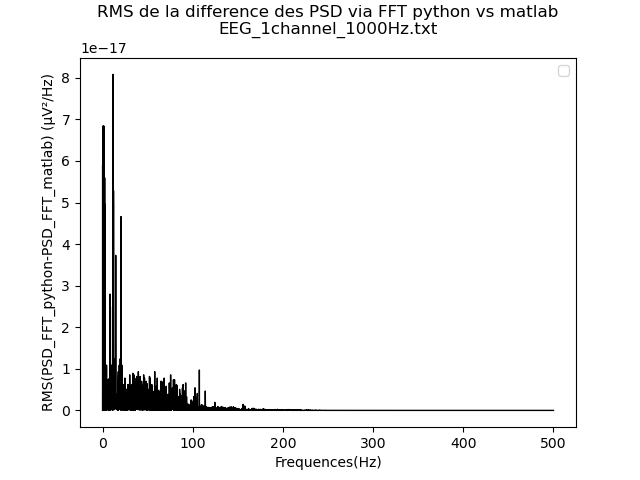

In [11]:
single_plot(FILENAME,fig_number=3,
            x=PSD_fft_python[:,0],y=RMS_PSD_FFT,
            fig_title="RMS de la difference des PSD via FFT python vs matlab",
            ylabel="RMS(PSD_FFT_python-PSD_FFT_matlab) (µV²/Hz)",
            xlabel="Frequences(Hz)")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


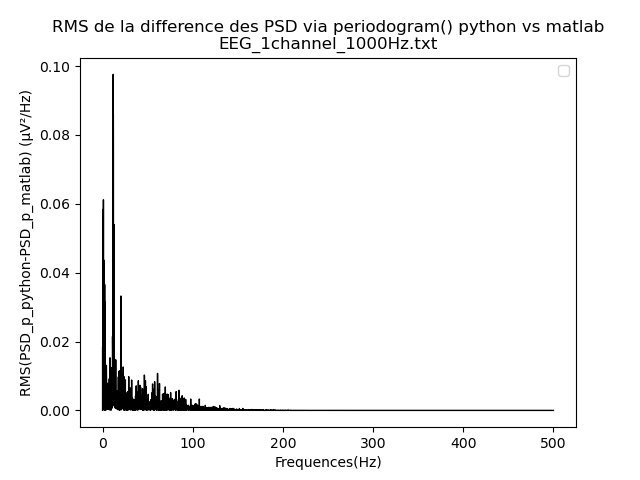

In [12]:
single_plot(FILENAME,fig_number=4,
            x=PSD_p_python[:,0],y=RMS_PSD_p,
            fig_title="RMS de la difference des PSD via periodogram() python vs matlab",
            ylabel="RMS(PSD_p_python-PSD_p_matlab) (µV²/Hz)",
            xlabel="Frequences(Hz)")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


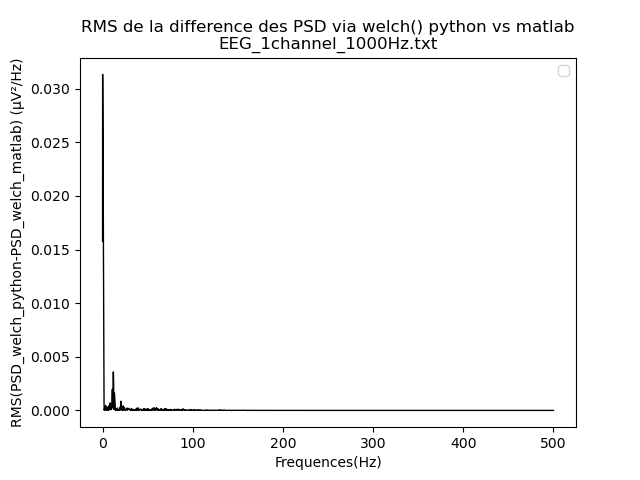

In [13]:
single_plot(FILENAME,fig_number=5,
            x=PSD_w_python[:,0],y=RMS_PSD_w,
            fig_title="RMS de la difference des PSD via welch() python vs matlab",
            ylabel="RMS(PSD_welch_python-PSD_welch_matlab) (µV²/Hz)",
            xlabel="Frequences(Hz)")